In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()

In [44]:
X = iris.data
X = X[0:100,0:2]
Y = iris.target
Y = Y[:100]

In [45]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
pd.DataFrame(data = X , columns = iris.feature_names[0:2])

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


In [47]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

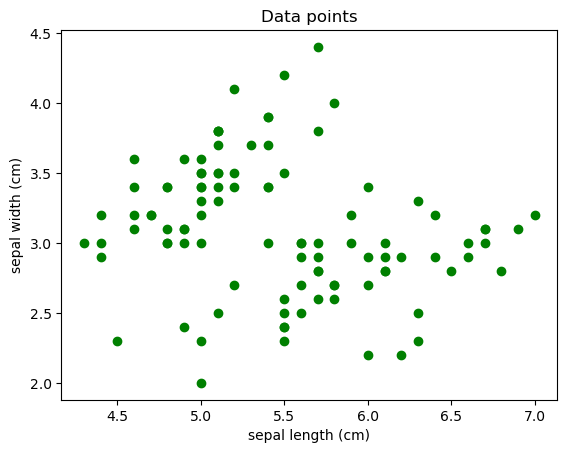

In [48]:
plt.title('Data points')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X[:,0],X[:,1],color = 'g')

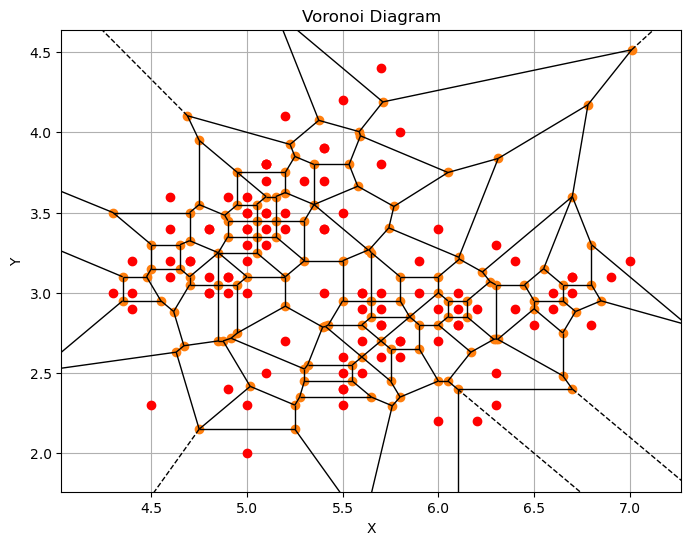

In [49]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


points = X

vor = Voronoi(points)


fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax)


ax.plot(points[:, 0], points[:, 1], 'ro')


ax.set_title('Voronoi Diagram')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)


plt.show()

          

In [50]:
def train_test_split(X,Y,test_size):
    idx = np.random.permutation(np.arange(Y.size))
    ts  = int(np.floor(test_size*Y.size))
    X_train_idx = idx[ts:]
    Y_train_idx = idx[ts:]
    X_test_idx  = idx[:ts]
    Y_test_idx  = idx[:ts]
    
    X_train = X[X_train_idx,:]
    Y_train = Y[Y_train_idx]
    X_test  = X[X_test_idx,:]
    Y_test  = Y[Y_test_idx]
    
    return X_train,Y_train, X_test,Y_test

In [51]:
X_train,Y_train, X_test,Y_test = train_test_split(X,Y,0.25)

In [57]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(75, 2) (75,) (25, 2) (25,)


In [61]:
dist = np.zeros((X_train.shape[0],X_test.shape[0]))

for i in range(X_train.shape[0]):
    for j in range(X_test.shape[0]):
        point1 = X_train[i,:]
        point2 = X_test[j,:]
        
        dist[i,j] = np.linalg.norm(point1 - point2)

In [83]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.223607,0.412311,2.061553,1.389244,1.208305,0.943398,1.345362,1.702939,0.200000,0.424264,...,2.137756,0.424264,0.905539,2.000000,1.923538,1.170470,1.400000,1.204159,1.345362,0.200000
1,0.781025,0.360555,1.526434,1.118034,0.894427,0.223607,1.315295,1.077033,0.707107,0.721110,...,1.565248,0.721110,0.282843,1.749286,1.562050,1.431782,0.761577,1.118034,1.236932,0.583095
2,0.860233,0.447214,1.442221,1.077033,0.854400,0.200000,1.303840,0.984886,0.806226,0.781025,...,1.476482,0.781025,0.223607,1.700000,1.500000,1.456022,0.670820,1.104536,1.216553,0.670820
3,0.500000,0.100000,1.615549,1.063015,0.848528,0.500000,1.170470,1.216553,0.509902,0.447214,...,1.676305,0.447214,0.400000,1.702939,1.562050,1.204159,0.905539,0.984886,1.118034,0.316228
4,1.208305,1.131371,0.824621,0.000000,0.223607,1.264911,0.424264,0.781025,1.500000,0.984886,...,0.948683,0.984886,0.854400,0.640312,0.538516,0.894427,0.728011,0.316228,0.282843,1.220656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.529706,1.341641,0.400000,0.447214,0.500000,1.280625,0.860233,0.412311,1.746425,1.315295,...,0.509902,1.315295,0.921954,0.700000,0.412311,1.341641,0.538516,0.761577,0.721110,1.486607
71,1.700000,1.431782,0.360555,0.781025,0.761577,1.220656,1.204159,0.141421,1.843909,1.503330,...,0.360555,1.503330,0.948683,1.019804,0.707107,1.664332,0.447214,1.081665,1.063015,1.612452
72,0.282843,0.509902,1.702939,0.948683,0.806226,1.029563,0.848528,1.431782,0.670820,0.100000,...,1.800000,0.100000,0.781025,1.526434,1.486607,0.707107,1.170470,0.721110,0.860233,0.412311
73,1.131371,1.208305,1.208305,0.424264,0.538516,1.503330,0.000000,1.204159,1.500000,0.921954,...,1.341641,0.921954,1.100000,0.728011,0.806226,0.509902,1.118034,0.200000,0.141421,1.220656


In [133]:
k = 3 
Y_pred = 5*(np.ones((Y_test.size)))
nidx = np.argsort(dist , axis = 0)

for i in range(Y_test.size):
    idx = nidx[:k,i]
    nearest_classes = Y_train[idx]
    if(np.sum(nearest_classes) >=2):
        Y_pred[i] = 1
        
    else:
        Y_pred[i] = 0
    

In [134]:
def accuracy_check(Y,Y_hat):
    check = (Y == Y_hat)
    count = 0
    for i in check:
        if i == True:
            count = count + 1
            
    return(100*(count/Y.size))        

In [135]:
accuracy_check(Y_test,Y_pred)

100.0